In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import rcParams
import scanpy as sc
import fa2

In [2]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
results_file = './write/paul15.h5ad'
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(3, 3), facecolor='white')

-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                         9.0.1
asttokens                   NA
backcall                    0.2.0
beta_ufunc                  NA
binom_ufunc                 NA
bottleneck                  1.3.4
cffi                        1.15.0
cloudpickle                 2.0.0
colorama                    0.4.4
cycler                      0.10.0
cython_runtime              NA
cytoolz                     0.11.0
dask                        2022.02.1
dateutil                    2.8.2
debugpy                     1.5.1
decorator                   5.1.1
defusedxml                  0.7.1
executing                   0.8.3
fa2                         NA
fsspec                      2022.02.0
google                      NA
h5py                        3.6.0
igraph                      0.9.9
ipykernel                   6.9.1
ipython_genutils            0.2.0
jedi                        0.18.1
jinja2                      2.11.3
joblib                      1.1.0
jupyt

In [3]:
adata = sc.read_h5ad('tumor1_v2.h5ad')

In [4]:
adata

AnnData object with n_obs × n_vars = 7448 × 32285
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_SCT', 'nFeature_SCT', 'seurat_clusters', 'Phase', 'old.ident', 'cell_type', 'barcode', 'UMAP_1', 'UMAP_2'
    uns: 'cell_type_colors'
    obsm: 'X_pca', 'X_umap'

In [5]:
adata.X = adata.X.astype('float64')

In [6]:
sc.pp.recipe_zheng17(adata)

running recipe zheng17
filtered out 7696 genes that are detected in less than 1 counts
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
    finished (0:00:00)


In [7]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    with n_comps=50
    finished (0:00:00)


In [8]:
sc.pp.neighbors(adata, n_neighbors=4, n_pcs=20)
sc.tl.draw_graph(adata)

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:04)
drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:00:55)


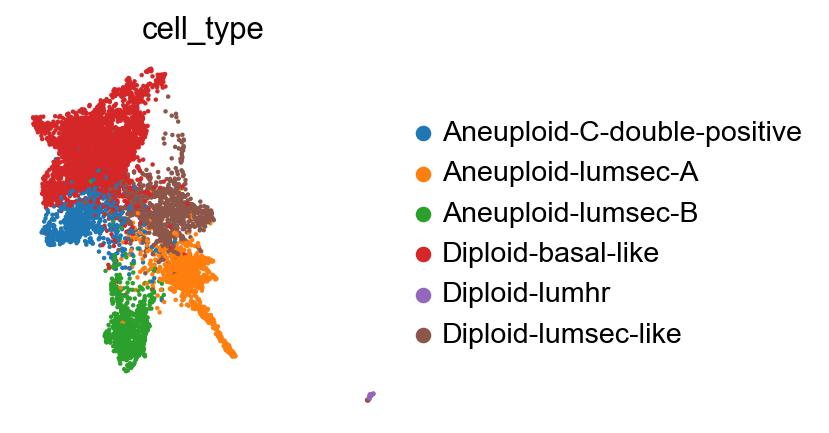

In [9]:
sc.pl.draw_graph(adata, color='cell_type', legend_loc='right margin')

In [10]:
sc.tl.diffmap(adata)
sc.pp.neighbors(adata, n_neighbors=10, use_rep='X_diffmap')

computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         1.         0.99452585 0.9934353  0.98969126 0.98722863
     0.9847289  0.98412967 0.9831056  0.98053116 0.97879744 0.9777423
     0.976852   0.9755157  0.9729952 ]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


In [11]:
sc.tl.draw_graph(adata)

drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:00:53)


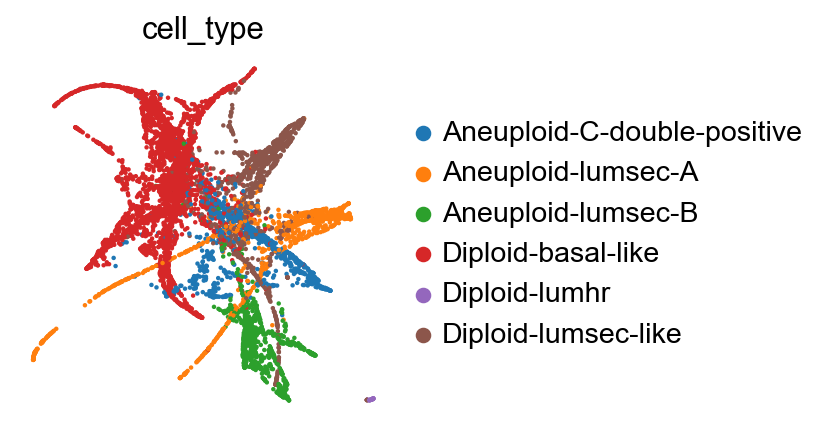

In [12]:
sc.pl.draw_graph(adata, color='cell_type', legend_loc='right margin')

In [13]:
sc.tl.leiden(adata, resolution=0.1)

running Leiden clustering
    finished: found 13 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


In [14]:
sc.tl.paga(adata, groups='leiden')

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)


--> added 'pos', the PAGA positions (adata.uns['paga'])


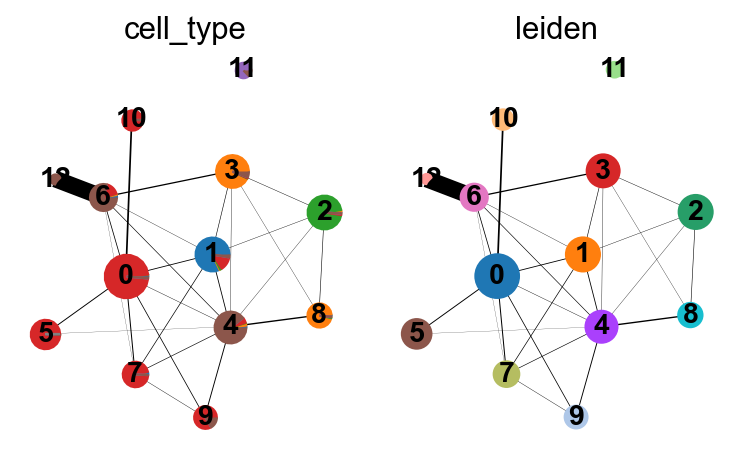

In [15]:
sc.pl.paga(adata, color=['cell_type','leiden'])

In [16]:
#skipped line 16 in tutorial:
#sc.pl.paga(adata, color=['louvain', 'Itga2b', 'Prss34', 'Cma1'])
adata.obs['leiden'].cat.categories

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'], dtype='object')

--> added 'pos', the PAGA positions (adata.uns['paga'])


<Axes:>

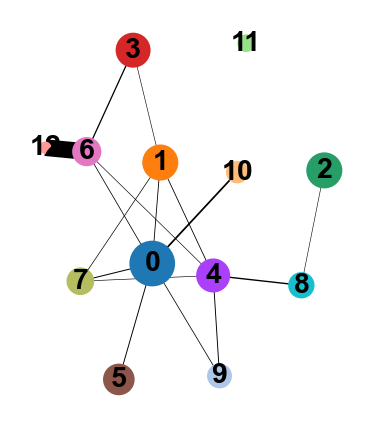

In [17]:
sc.pl.paga(adata, threshold=0.03, show=False)

In [18]:
sc.tl.draw_graph(adata, init_pos='paga')

drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:00:55)


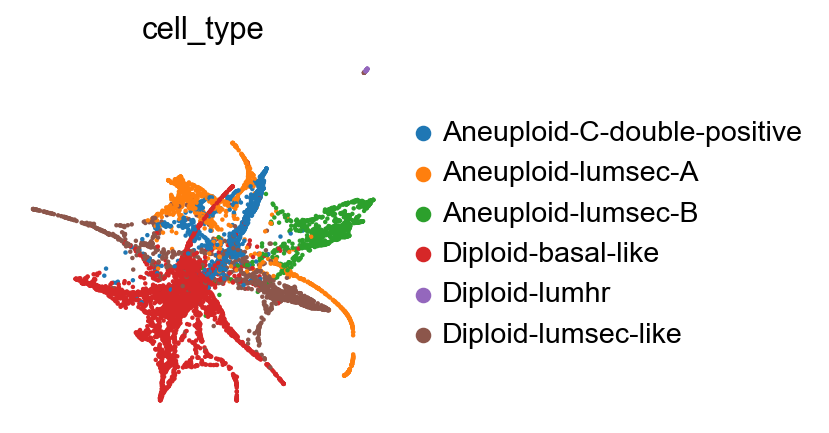

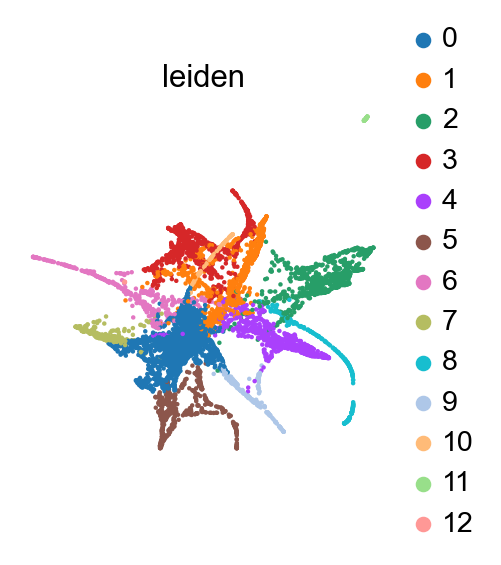

In [19]:
sc.pl.draw_graph(adata, color=['cell_type'], legend_loc='right margin')
sc.pl.draw_graph(adata, color=['leiden'], legend_loc='right margin')

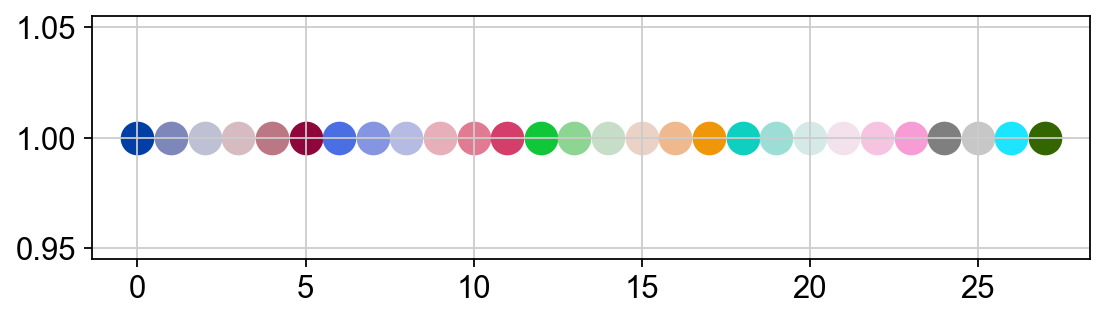

In [20]:
pl.figure(figsize=(8, 2))
for i in range(28):
    pl.scatter(i, 1, c=sc.pl.palettes.zeileis_28[i], s=200)
pl.show()

In [21]:
zeileis_colors = np.array(sc.pl.palettes.zeileis_28)

--> added 'pos', the PAGA positions (adata.uns['paga'])


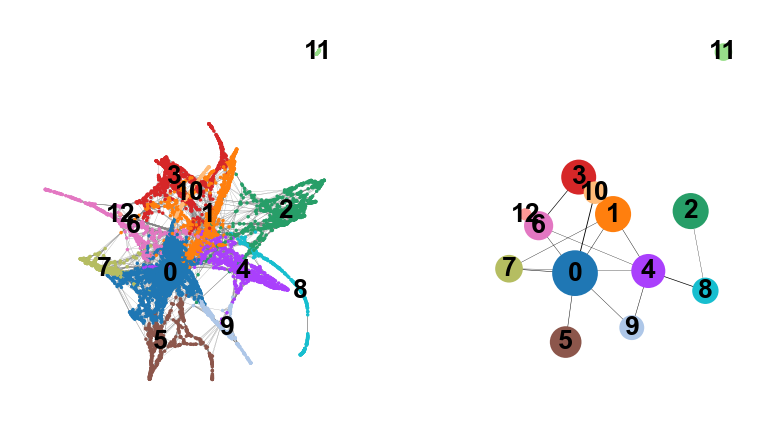

In [22]:
sc.pl.paga_compare(
    adata, threshold=0.03, title='', right_margin=0.2, size=10, edge_width_scale=0.5,
    legend_fontsize=12, fontsize=12, frameon=False, edges=True, save=True)

In [23]:
adata.uns['iroot'] = np.flatnonzero(adata.obs['cell_type'] == 'Aneuploid-C-double-positive')[0]

In [24]:
sc.tl.dpt(adata)

computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)


In [25]:
adata_raw = sc.read_h5ad('tumor1_v2.h5ad')
sc.pp.log1p(adata_raw)
sc.pp.scale(adata_raw)
adata.raw = adata_raw

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


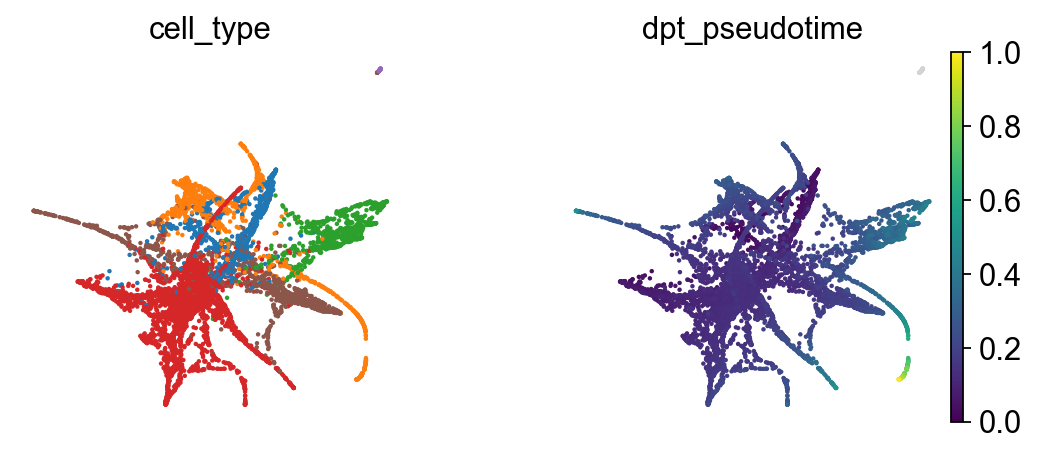

In [26]:
sc.pl.draw_graph(adata, color=['cell_type', 'dpt_pseudotime'], legend_loc='right_margin')
adata.write('paga_tumor1.h5ad')

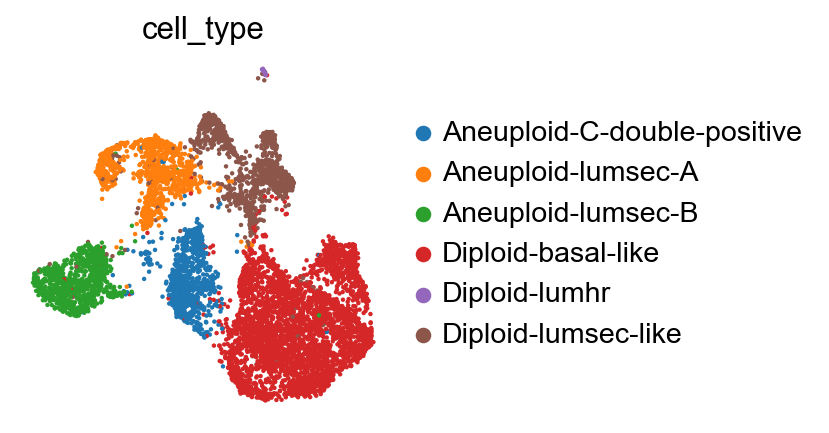

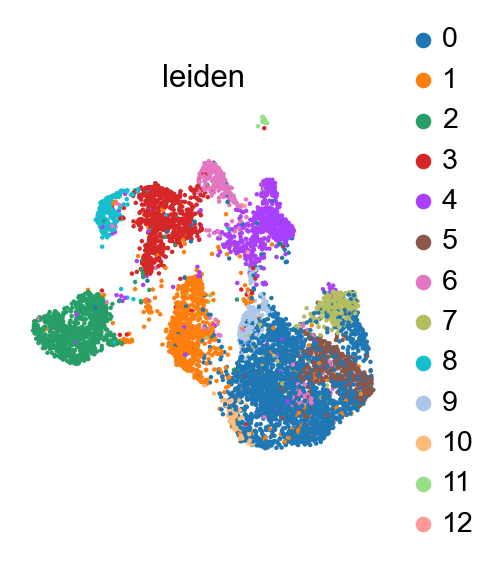

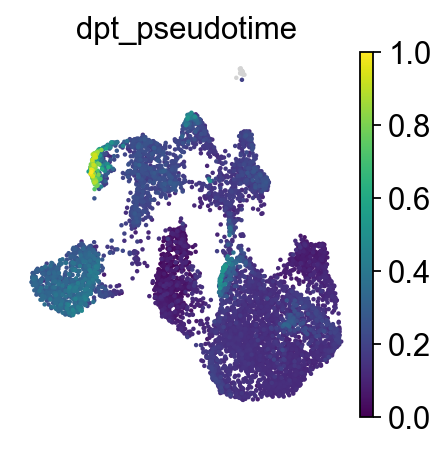

In [27]:
sc.pl.umap(adata, color=['cell_type'], frameon=False)
sc.pl.umap(adata, color=['leiden'], frameon=False)
sc.pl.umap(adata, color=['dpt_pseudotime'], frameon=False) 

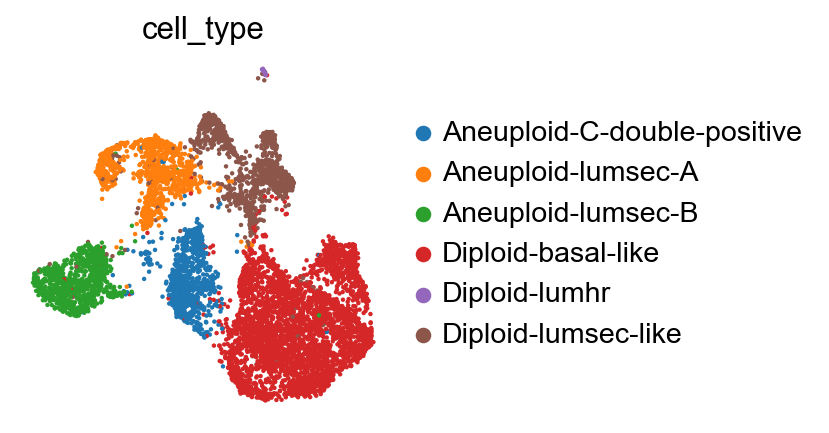

In [29]:
#testing if file worked
test = sc.read_h5ad('paga_tumor1.h5ad')
sc.pl.umap(test, color=['cell_type'], frameon=False)